In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [3]:
stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


In [ ]:
periods = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt', header=None, infer_nrows=1000)
periods.columns = ['ID','LAT','LON','ELEM','TiMIN','TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767020,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767021,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767022,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767023,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [ ]:
merged_stns = pd.merge(stn_ids,periods[['ID','ELEM','TiMIN','TiMAX']],
                       how='left',left_on='ID',right_on='ID')
merged_stns

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,TMAX,1949.0,1949.0
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,TMIN,1949.0,1949.0
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,PRCP,1949.0,1949.0
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,SNOW,1949.0,1949.0
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,SNWD,1949.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...
767057,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,PRCP,1951.0,2025.0
767058,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,TAVG,1962.0,2025.0
767059,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,TMAX,1951.0,1990.0
767060,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,TMIN,1951.0,1990.0


In [31]:
# find stations between 1991 and 2020
sel_stns = merged_stns[merged_stns['TiMAX'] >= 1991].copy()
sel_stns


,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN,ELEM,TiMIN,TiMAX
18,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0,TMAX,1944.0,2025.0
19,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0,TMIN,1944.0,2025.0
20,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0,PRCP,1944.0,2025.0
21,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0,TAVG,1944.0,2025.0
22,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,41194.0,TMAX,1983.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...
767051,ZI000067975,-20.067,30.867,1095.0,NaN,MASVINGO,NaN,67975.0,TAVG,1962.0,2025.0
767055,ZI000067983,-20.200,32.616,1132.0,NaN,CHIPINGE,GSN,67983.0,TMAX,1951.0,2025.0
767056,ZI000067983,-20.200,32.616,1132.0,NaN,CHIPINGE,GSN,67983.0,TMIN,1951.0,2025.0
767057,ZI000067983,-20.200,32.616,1132.0,NaN,CHIPINGE,GSN,67983.0,PRCP,1951.0,2025.0


In [38]:
# calculating distance from Portland MI
portland_lat = 42.8672
portland_lon = -84.9101
sel_stns['dist'] = np.sqrt((sel_stns['LON'] - portland_lon)**2 + 
                           (sel_stns['LAT'] - portland_lat)**2) 

In [42]:
sel_stns[sel_stns['ELEM'].isin(['TMIN','TMAX'])].sort_values('dist', ascending=True).head(20)

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN,ELEM,TiMIN,TiMAX,dist
525995,USC00203306,42.7622,-84.7617,244.1,MI,GRAND LEDGE 1 NW,NaN,NaN,TMIN,2011.0,2013.0,0.181790
525994,USC00203306,42.7622,-84.7617,244.1,MI,GRAND LEDGE 1 NW,NaN,NaN,TMAX,2011.0,2013.0,0.181790
526848,USC00204078,42.9531,-85.0778,245.4,MI,IONIA 2SSW,NaN,NaN,TMAX,1896.0,2013.0,0.188420
526849,USC00204078,42.9531,-85.0778,245.4,MI,IONIA 2SSW,NaN,NaN,TMIN,1896.0,2013.0,0.188420
526870,USC00204079,42.9814,-85.1208,242.3,MI,IONIA 3 W,NaN,NaN,TMAX,2021.0,2025.0,0.239658
526871,USC00204079,42.9814,-85.1208,242.3,MI,IONIA 3 W,NaN,NaN,TMIN,2021.0,2025.0,0.239658
736976,USW00014836,42.7761,-84.5997,261.2,MI,LANSING CAPITAL CITY AP,NaN,72539.0,TMAX,1948.0,2025.0,0.323492
736977,USW00014836,42.7761,-84.5997,261.2,MI,LANSING CAPITAL CITY AP,NaN,72539.0,TMIN,1948.0,2025.0,0.323492
524482,USC00201476,42.5500,-84.8250,274.9,MI,CHARLOTTE,NaN,NaN,TMIN,1902.0,2019.0,0.328417
524481,USC00201476,42.5500,-84.8250,274.9,MI,CHARLOTTE,NaN,NaN,TMAX,1902.0,2019.0,0.328417


In [50]:
code = 'USW00014836'
df = pd.read_parquet(
    f"s3://noaa-ghcn-pds/parquet/by_station/STATION={code}/",
    storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
)
df['DATE'] = pd.to_datetime(df['DATE'])

In [55]:
data_df = df[(df['ELEMENT'].isin(['TMIN','TMAX'])) & (df['DATE'] >= '1991-01-01') & (df['DATE'] <= '2010-12-31') ].copy()
data_df

,ID,DATE,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
213997,USW00014836,1991-01-01,-6,None,None,0,None,TMAX
213998,USW00014836,1991-01-02,-17,None,None,0,None,TMAX
213999,USW00014836,1991-01-03,-72,None,None,0,None,TMAX
214000,USW00014836,1991-01-04,-44,None,None,0,None,TMAX
214001,USW00014836,1991-01-05,-39,None,None,0,None,TMAX
...,...,...,...,...,...,...,...,...
247718,USW00014836,2010-12-27,-139,None,None,0,2400,TMIN
247719,USW00014836,2010-12-28,-78,None,None,0,2400,TMIN
247720,USW00014836,2010-12-29,-61,None,None,0,2400,TMIN
247721,USW00014836,2010-12-30,0,None,None,0,2400,TMIN


In [95]:
data_no_leap =  data_df[~((data_df['DATE'].dt.month==2)&(data_df['DATE'].dt.day==29))]

tmp_mx_mx = (data_no_leap[data_no_leap['ELEMENT'] == 'TMAX']['DATA_VALUE'] /10
            ).groupby(data_no_leap['DATE'].dt.day_of_year).max().reset_index()
tmp_mx_avg = (data_no_leap[data_no_leap['ELEMENT'] == 'TMAX']['DATA_VALUE'] /10
            ).groupby(data_no_leap['DATE'].dt.day_of_year).mean().reset_index()
tmp_mn_mn = (data_no_leap[data_no_leap['ELEMENT'] == 'TMIN']['DATA_VALUE'] /10
            ).groupby(data_no_leap['DATE'].dt.day_of_year).min().reset_index()
tmp_mn_avg = (data_no_leap[data_no_leap['ELEMENT'] == 'TMIN']['DATA_VALUE'] /10
            ).groupby(data_no_leap['DATE'].dt.day_of_year).mean().reset_index()

In [97]:
tmp_mx_mx.rename(columns={'DATA_VALUE': 'record_max_temp'}, inplace=True)
tmp_mx_avg.rename(columns={'DATA_VALUE': 'average_max_temp'}, inplace=True)
tmp_mn_mn.rename(columns={'DATA_VALUE': 'record_min_temp'}, inplace=True)
tmp_mn_avg.rename(columns={'DATA_VALUE': 'average_min_temp'}, inplace=True)

In [108]:
pd.merge(pd.merge(pd.merge(tmp_mn_mn,tmp_mn_avg,how='left',on='DATE'),
                           tmp_mx_avg,how='left',on='DATE'),
                           tmp_mx_mx,how='left',on='DATE')

,DATE,record_min_temp,average_min_temp,average_max_temp,record_max_temp
0,1,-24.4,-8.055,0.135,8.9
1,2,-26.1,-7.700,1.190,14.4
2,3,-17.8,-6.785,0.940,14.4
3,4,-18.9,-5.880,0.805,16.1
4,5,-20.0,-5.715,-0.340,12.2
...,...,...,...,...,...
361,362,-21.1,-8.365,1.175,15.6
362,363,-27.8,-6.920,1.500,13.3
363,364,-16.7,-5.745,1.325,11.1
364,365,-15.6,-4.690,2.295,12.2


In [109]:
def wea_temp_func(code):
    df = pd.read_parquet(
    f"s3://noaa-ghcn-pds/parquet/by_station/STATION={code}/",
    storage_options={"anon": True})  # passed to `s3fs.S3FileSystem
    df['DATE'] = pd.to_datetime(df['DATE'])
    data_df = df[(df['ELEMENT'].isin(['TMIN','TMAX'])) 
                & (df['DATE'] >= '1991-01-01') 
                & (df['DATE'] <= '2010-12-31') ].copy()
    # removing leap day
    no_leap =  data_df[~((data_df['DATE'].dt.month==2)&(data_df['DATE'].dt.day==29))]
    #doing group by
    tmp_mx_mx = (no_leap[no_leap['ELEMENT'] == 'TMAX']['DATA_VALUE'] /10
            ).groupby(no_leap['DATE'].dt.day_of_year).max().reset_index()
    tmp_mx_avg = (no_leap[no_leap['ELEMENT'] == 'TMAX']['DATA_VALUE'] /10
            ).groupby(no_leap['DATE'].dt.day_of_year).mean().reset_index()
    tmp_mn_mn = (no_leap[no_leap['ELEMENT'] == 'TMIN']['DATA_VALUE'] /10
            ).groupby(no_leap['DATE'].dt.day_of_year).min().reset_index()
    tmp_mn_avg = (no_leap[no_leap['ELEMENT'] == 'TMIN']['DATA_VALUE'] /10
            ).groupby(no_leap['DATE'].dt.day_of_year).mean().reset_index()
    # renaming columns
    tmp_mx_mx.rename(columns={'DATA_VALUE': 'record_max_temp'}, inplace=True)
    tmp_mx_avg.rename(columns={'DATA_VALUE': 'average_max_temp'}, inplace=True)
    tmp_mn_mn.rename(columns={'DATA_VALUE': 'record_min_temp'}, inplace=True)
    tmp_mn_avg.rename(columns={'DATA_VALUE': 'average_min_temp'}, inplace=True)
    # merging data
    out_df = pd.merge(pd.merge(pd.merge(tmp_mn_mn,
                                        tmp_mn_avg,how='left',on='DATE'),
                                        tmp_mx_avg,how='left',on='DATE'),
                                        tmp_mx_mx,how='left',on='DATE')
    return out_df
    
    

In [111]:
data = wea_temp_func(code)
data

,DATE,record_min_temp,average_min_temp,average_max_temp,record_max_temp
0,1,-24.4,-8.055,0.135,8.9
1,2,-26.1,-7.700,1.190,14.4
2,3,-17.8,-6.785,0.940,14.4
3,4,-18.9,-5.880,0.805,16.1
4,5,-20.0,-5.715,-0.340,12.2
...,...,...,...,...,...
361,362,-21.1,-8.365,1.175,15.6
362,363,-27.8,-6.920,1.500,13.3
363,364,-16.7,-5.745,1.325,11.1
364,365,-15.6,-4.690,2.295,12.2


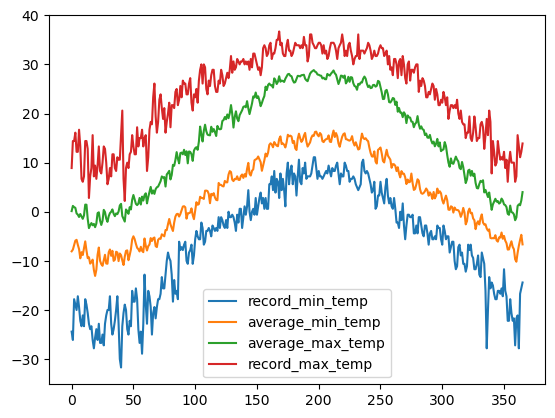

In [134]:
a = data[['record_min_temp']]
b = data[['average_min_temp']]
c = data[['average_max_temp']]
d = data[['record_max_temp']]

plt.plot(a,label='record_min_temp')
plt.plot(b,label='average_min_temp')
plt.plot(c,label='average_max_temp')
plt.plot(d,label='record_max_temp')

plt.legend()

#lt.fill_between(x=data['DATE'].ravel(),y1=b.values.ravel(),y2=c.values.ravel(),color='lightblue', alpha=0.5)

In [129]:
a.values.ravel()

array([-24.4, -26.1, -17.8, -18.9, -20. , -17.2, -19.4, -22.2, -23.3,
       -21.1, -23.3, -17.8, -18.9, -20.6, -22.8, -23.9, -23.3, -26.1,
       -27.8, -25.6, -23.9, -26.1, -22.8, -26.7, -26.7, -25. , -27.2,
       -22.8, -21.1, -20. , -20. , -17.2, -22.8, -25. , -23.9, -22.2,
       -20. , -17.2, -22.8, -30. , -31.7, -23.3, -20.6, -18.9, -20. ,
       -23.9, -25. , -22.2, -23.3, -16.1, -18.3, -18.3, -15.6, -17.8,
       -23.9, -26.7, -24.4, -28.9, -22.8, -12.8, -18.9, -22.8, -16.1,
       -17.2, -19.4, -25. , -20.6, -19.4, -21.7, -19.4, -17.8, -17.8,
       -16.7, -13.3, -15.6, -15.6, -12.8, -10. ,  -8.3,  -9.4, -10. ,
       -12.8, -18.3, -13.9, -16.7, -16.1, -17.8,  -6.1,  -7.8,  -7.2,
        -7.8,  -6.7,  -6.1, -10. , -10.6,  -8.3,  -7.8,  -6.7, -10.6,
        -8.9,  -5.6,  -3.9,  -5. ,  -5.6,  -5.6,  -2.2,  -3.3,  -6.7,
        -6.1,  -3.9,  -3.9,  -3.3,  -3.9,  -5. ,  -2.8,  -3.3,  -3.9,
        -3.3,  -3.9,  -1.1,  -3.3,  -1.1,  -1.7,  -2.8,  -3.3,  -1.7,
        -3.3,   0. ,